In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]
train_x, test_x = data.data[:100, 1:3], data.data[100:, 1:3]
train_y, test_y = data.target[:100], data.target[100:]

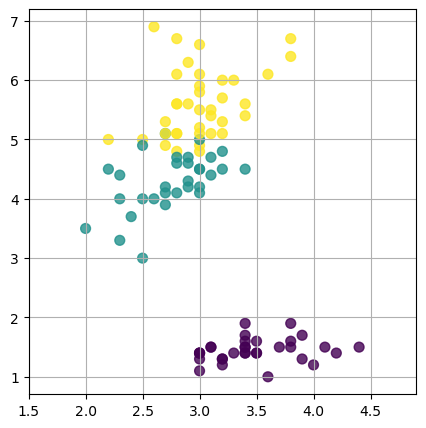

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=0.8, c=train_y)
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
plt.show()

In [4]:
def mean_squared_error(independent, dependent):
    global weight
    probability = np.dot(independent, weight)
    loss = np.mean((probability - dependent) ** 2)
    print(f"cost: {loss:.3f}")

def mean_absolute_error(independent, dependent):
    global weight
    probability = np.dot(independent, weight)
    loss = np.mean(abs(probability - dependent))
    print(f"cost: {loss:.3f}")

In [5]:
weight = np.random.rand(train_x.shape[1])
lr = 0.001
iterations = 10000

In [6]:
mean_squared_error(test_x, test_y)
mean_absolute_error(test_x, test_y)

cost: 0.561
cost: 0.644


In [7]:
def gdr(x, y, weight, lr):
    indications = np.dot(x, weight)
    weight -= (lr / x.shape[0]) * np.dot(x.T, (indications - y))

In [8]:
for epoch in range(iterations): gdr(train_x, train_y, weight, lr)

In [9]:
def pred(x, weight):
    if type(x) == list: x = np.array(x)
    return round(np.dot(x, weight))

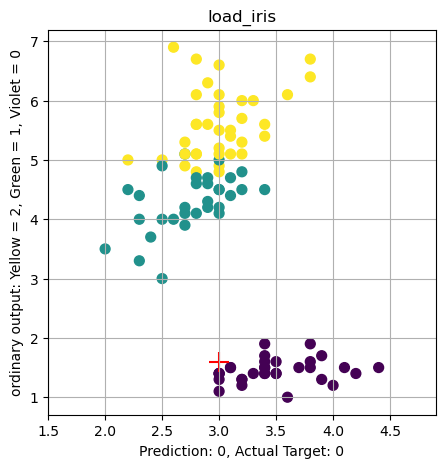

In [10]:
index = random.randrange(len(test_y))
prediction = pred(test_x[index, :], weight)

plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=1, c=train_y)
plt.scatter(x=test_x[index,0], y=test_x[index,1], c='r', s=200, marker='+')
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
plt.xlabel(f"Prediction: {prediction:.0f}, Actual Target: {test_y[index]}")
plt.ylabel("ordinary output: Yellow = 2, Green = 1, Violet = 0")
plt.title("load_iris")
plt.show()

In [11]:
mean_squared_error(test_x, test_y)
mean_absolute_error(test_x, test_y)

cost: 0.061
cost: 0.195
